In [49]:
import numpy as np
import pandas
import librosa
import librosa.display
from glob import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [50]:
ds = glob('mswc_microset/mswc_microset/*/clips/*/*.opus')

In [51]:
file_num_1, file_num_2 = 5, 10

file1 = ds[file_num_1]
file2 = ds[file_num_2]

In [52]:
y1, sr1 = librosa.load(file1)
y2, sr2 = librosa.load(file2)

In [53]:
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=20)
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=20)
n_coeffs, n_frames1 = mfccs1.shape
_, n_frames2 = mfccs2.shape

In [54]:
max_frames = max(n_frames1, n_frames2)
mfccs1 = np.pad(mfccs1, ((0, 0), (0, max_frames - n_frames1)), mode='constant')
mfccs2 = np.pad(mfccs2, ((0, 0), (0, max_frames - n_frames2)), mode='constant')

In [55]:
time = np.arange(max_frames)
coeffs = np.arange(n_coeffs)

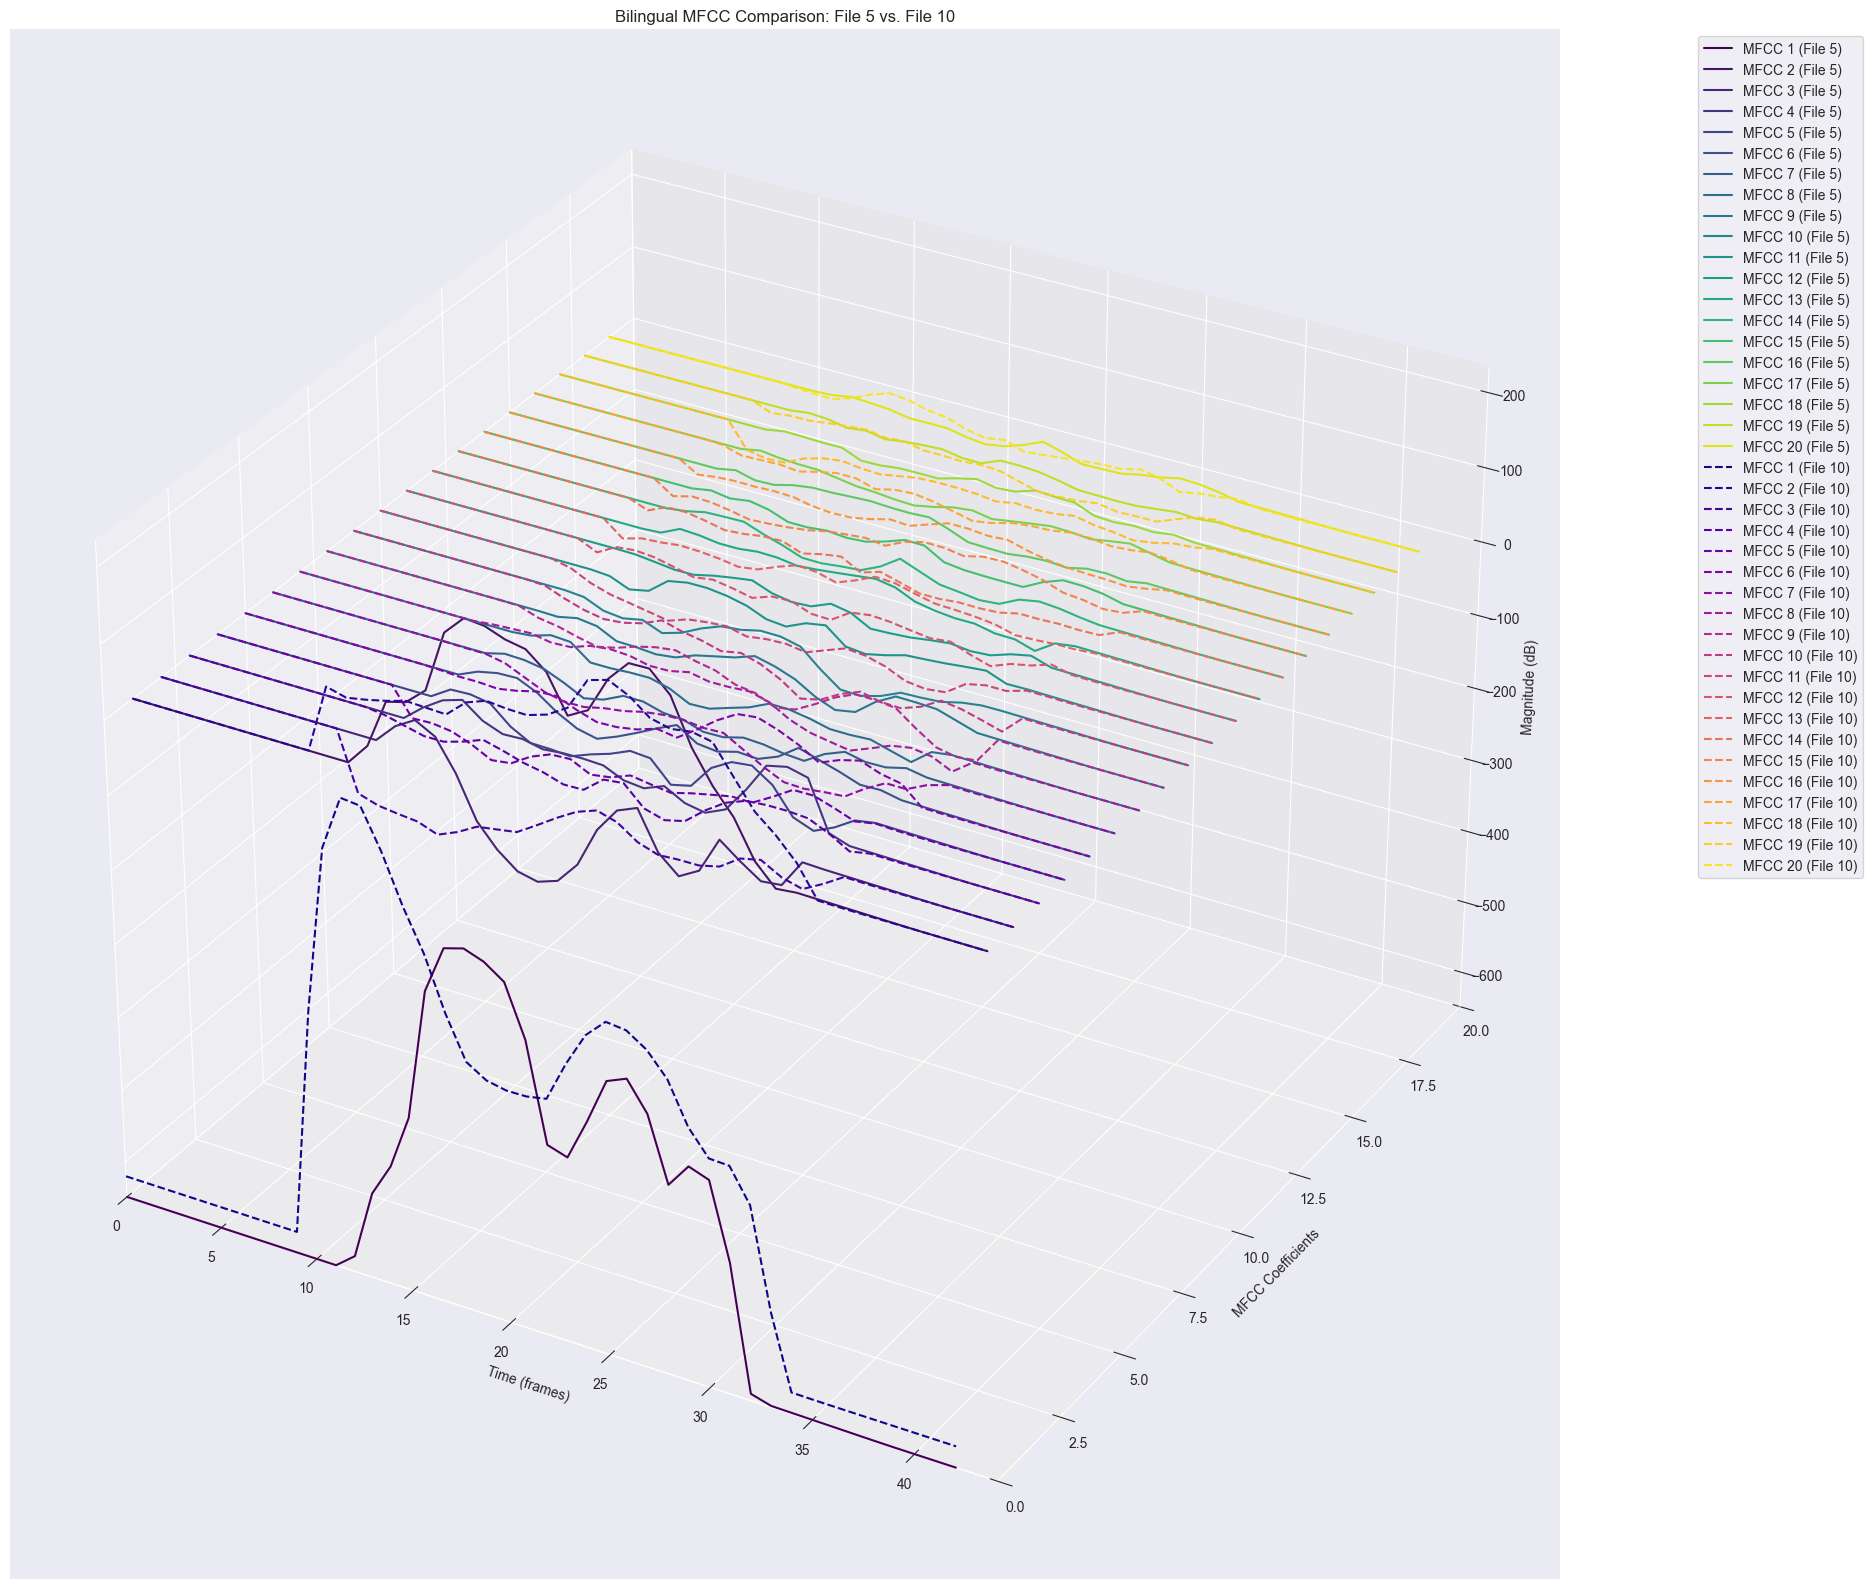

In [57]:
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Time (frames)', fontsize=10)
ax.set_ylabel('MFCC Coefficients', fontsize=10)
ax.set_zlabel('Magnitude (dB)', fontsize=10)
ax.set_title(f'Bilingual MFCC Comparison: File {file_num_1} vs. File {file_num_2}', fontsize=12)

ax.set_xlim(0, max_frames)
ax.set_ylim(0, n_coeffs)
ax.set_zlim(min(mfccs1.min(), mfccs2.min()), max(mfccs1.max(), mfccs2.max()))

# Create empty lines for each file
lines1 = [ax.plot([], [], [], lw=1.5, color=plt.cm.viridis(i / n_coeffs),
       label=f'MFCC {i+1} (File {file_num_1})')[0] for i in coeffs]
lines2 = [ax.plot([], [], [], lw=1.5, linestyle='--', color=plt.cm.plasma(i / n_coeffs),
       label=f'MFCC {i+1} (File {file_num_2})')[0] for i in coeffs]

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Animation function
def update(frame):
    for i, (line1, line2) in enumerate(zip(lines1, lines2)):
        # Update data up to the current frame
        line1.set_data(time[:frame], np.ones(frame) * i)
        line1.set_3d_properties(mfccs1[i, :frame])
        line2.set_data(time[:frame], np.ones(frame) * i)
        line2.set_3d_properties(mfccs2[i, :frame])
    return lines1 + lines2

# Animate (reduce frames for speed with `frames=range(0, max_frames, 5)`)
ani = FuncAnimation(
fig, update, frames=max_frames, interval=50, blit=False
)

# Save as GIF (requires `pillow`)
ani.save('bilingual_mfcc_comparison.gif', writer='pillow', fps=15, dpi=100)

# Alternatively, save as MP4 (requires `ffmpeg`)
# ani.save('bilingual_mfcc_comparison.mp4', writer='ffmpeg', fps=15)

plt.tight_layout()
plt.show()